# Import

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Code generation and output production

In [55]:
# General class for the code generation and output production
class code:
    def __init__(self, len = None, probability = None, encoder_name = None, interleaver_name = None, line_encoder_name = None, burst_num = None, record = False, socket_array = None):
        self.len = len
        self.p = probability    
        self.encoder_name = encoder_name
        self.interleaver_name = interleaver_name
        self.line_encoder_name = line_encoder_name 
        self.burst_num = burst_num
        self.record = record
        self.from_txt = True
        self.socket_array = socket_array
        # Generates random code of determined length and determined probability of 1's
        if len and probability:
            self.sequence = np.random.choice([1, 0], self.len, p = [self.p, 1-self.p])
        
    def code_from_array(self, array):
        self.len = len(array)
        self.p = None  
        self.sequence = array
        
    def print_sequence(self):
        print(self.sequence)
    
    def code_from_array(self, array):
        self.sequence = array
    
    def create_BSC(self, probability = None):
        if probability is not None:
            self.BSC_p = probability
        # Generates random code of determined length and determined probability of 1's
        if self.burst_num is not None:
            single_BSC_len = int(np.ceil(len(self.seq_line_enc)/self.burst_num))
            self.BSC = np.random.choice([1, 0], single_BSC_len, p = [self.BSC_p, 1-self.BSC_p])
            BSC_repeated = []
            for elem in self.BSC:
                for i in range(self.burst_num):
                    BSC_repeated.append(elem)
            self.BSC = BSC_repeated[0:len(self.seq_line_enc)]      
        else:
            self.BSC = np.random.choice([1, 0], len(self.seq_line_enc), p = [self.BSC_p, 1-self.BSC_p]) 
                
    def compute_output(self):
        
        if self.encoder_name is not None:
            self.seq_enc = encoder(self, self.encoder_name).encode()
        else:
            self.seq_enc = self.sequence
            
        if self.interleaver_name is not None:
            self.seq_interleaved = interleaver(self, self.interleaver_name).interleave()
        else:
            self.seq_interleaved = self.seq_enc    
            
        if self.line_encoder_name is not None:
            self.seq_line_enc = line_encoder(self, self.line_encoder_name).encode()
        else:
            self.seq_line_enc = self.seq_interleaved        
            
        self.create_BSC()    
        self.BSC_out = np.logical_xor(self.seq_line_enc, self.BSC).astype(int) 
        # Inversion
        self.BSC_out = np.logical_xor(True, self.BSC_out).astype(int)
        
        if self.line_encoder_name is not None:
            self.seq_line_dec = line_decoder(self, self.line_encoder_name).decode()
        else:
            self.seq_line_dec = self.BSC_out   
        
        if self.interleaver_name is not None:
            self.seq_deinterleaved = deinterleaver(self, self.interleaver_name).deinterleave()
        else:
            self.seq_deinterleaved = self.seq_line_dec
        
        if self.encoder_name is not None:
            self.seq_dec = decoder(self, self.encoder_name).decode()   
        else:
            self.seq_dec = self.seq_deinterleaved
            
        return self.seq_dec
    
    def compute_error(self):
        self.compute_output()
        self.error = np.logical_xor(self.seq_dec, self.sequence).astype(int)
        return self.error
    
    def compute_error_rate(self):
        if self.encoder_name is not None:
            path = "Umut Data/" + self.encoder_name
        else:
            path = "Umut Data/Original"
        if self.from_txt:
            if self.socket_array is not None:
                self.BSC_out = self.socket_array[0].astype(int)
            else:
                self.BSC_out = np.loadtxt(path + "/nrzm_encoder.txt").astype(int)
                
            self.message = np.loadtxt("Umut Data/message.txt").astype(int)

            if self.line_encoder_name is not None:
                self.seq_line_dec = line_decoder(self, self.line_encoder_name).decode()
            else:
                self.seq_line_dec = self.BSC_out   
        
            if self.interleaver_name is not None:
                self.seq_deinterleaved = deinterleaver(self, self.interleaver_name).deinterleave()
            else:
                self.seq_deinterleaved = self.seq_line_dec

            if self.encoder_name is not None:
                self.seq_dec = decoder(self, self.encoder_name).decode()   
            else:
                self.seq_dec = self.seq_deinterleaved
        
            np.savetxt(path + "/xxx.txt", self.seq_dec-self.message, fmt='%i')
            self.error_rate = 0
            
        else:
            self.compute_error()
            self.error_rate = np.sum(self.error)/len(self.error)
            
        if self.encoder_name is not None:
            path = "Yasin Data/" + self.encoder_name
        else:
            path = "Yasin Data/Original"
        if self.record:
            np.savetxt(path + "/input.txt", self.sequence, fmt='%i')
            np.savetxt(path + "/channel_encoder.txt", self.seq_enc, fmt='%i')
            np.savetxt(path + "/interleaver.txt", self.seq_interleaved, fmt='%i')
            np.savetxt(path + "/nrzm_encoder.txt", self.seq_line_enc, fmt='%i')
            """np.savetxt(path + "/BSC.txt", self.BSC, fmt='%i')
            np.savetxt(path + "/BSC_out.txt", self.BSC_out, fmt='%i')
            np.savetxt(path + "/nrzm_decoder.txt", self.seq_line_dec, fmt='%i')
            np.savetxt(path + "/deinterleaver.txt", self.seq_deinterleaved, fmt='%i')
            np.savetxt(path + "/channel_decoder.txt", self.seq_dec, fmt='%i')
            """
            
        """print("sequence =          ", self.sequence)
        print("seq_enc =           ", self.seq_enc)
        print("seq_interleaved =   ", self.seq_interleaved)
        print("seq_line_enc =      ", self.seq_line_enc)
        print("BSC =               ", self.BSC)
        print("BSC_out =           ", self.BSC_out)
        print("seq_line_dec =      ", self.seq_line_dec)
        print("seq_deinterleaved = ", self.seq_deinterleaved)
        print("seq_dec =           ", self.seq_dec)
        print("error =             ", self.error)
        print("error rate =        ", self.error_rate)
        print(" ")"""
        return self.error_rate

# Encoders and Decoders

In [56]:
# Encoder class including repetition code and Hamming Code
class encoder:
    def __init__(self, x, name = None):
        self.x = x
        self.name = name
    
    def encode(self):
        if self.name == "Repetition (3,1)":
            return self.repetition(3)
        if self.name == "Repetition (5,1)":
            return self.repetition(5)
        if self.name == "Hamming (7,4)":
            return self.hamming(3)
        if self.name == "Hamming (15,11)":
            return self.hamming(4)
        if self.name == "Hamming (31,26)":
            return self.hamming(5)
    
    def repetition(self, n):
        x_enc = []
        for elem in self.x.sequence:
            for i in range(n):
                x_enc.append(elem)
        return x_enc
    
    def hamming(self, m):
        self.m = m
        self.n = 2**m - 1
        self.k = 2**m - m - 1
        x_enc = []
        num_of_blocks = int(np.ceil(len(self.x.sequence)/self.k))
        for i in range(num_of_blocks):
            block = self.x.sequence[i*self.k:(i+1)*self.k]
            x_enc = np.concatenate((x_enc, self.single_code_word(block))).astype(int)
        return x_enc
    
    def single_code_word(self, single_message):
        for i in range(self.m):
            single_message = np.insert(single_message, 2**i-1, 0)
        for i in range(self.m):
            step = 2**i
            parity = 0
            for j in range(int(np.ceil((self.n-2**i + 1)/(2*step)))):
                start = 2**i+2*step*j-1
                parity += np.sum(single_message[start:start+step])
            parity -= single_message[2**i - 1] 
            parity = np.mod(parity, 2)
            single_message[2**i-1] = parity
        return single_message

In [57]:
# Decoder class for repetition code and Hamming Code
class decoder:
    def __init__(self, x, name = None):
        self.x = x
        self.name = name
    
    def decode(self):    
        if self.name == "Repetition (3,1)":
            return self.repetition(3)
        if self.name == "Repetition (5,1)":
            return self.repetition(5)
        if self.name == "Hamming (7,4)":
            return self.hamming(3)
        if self.name == "Hamming (15,11)":
            return self.hamming(4)
        if self.name == "Hamming (31,26)":
            return self.hamming(5)
    
    def repetition(self, n):
        sequence = self.x.seq_deinterleaved
        x_dec = []
        for i in range(int(len(sequence)/n)):
            n_bit = sequence[i*n:(i+1)*n]
            bit = (np.sum(n_bit) / n > .5).astype(int)    
            x_dec.append(bit)
        return x_dec
    
    def hamming(self, m):
        self.m = m
        self.n = 2**m - 1
        self.k = 2**m - m - 1
        
        sequence = self.x.seq_deinterleaved
        x_dec = []
        num_of_blocks = int(np.ceil(len(sequence)/self.n))
        for i in range(num_of_blocks):
            block = sequence[i*self.n:(i+1)*self.n]
            x_dec = np.concatenate((x_dec, self.single_code_word(block.copy()))).astype(int)
        return x_dec
    
    def single_code_word(self, single_message):
        remove_indexes = []
        for i in range(self.m):
            remove_indexes.append(2**i-1) 
        removed_single_message = np.delete(single_message, remove_indexes)
        my_code = code()
        my_code.code_from_array(removed_single_message)
        encoded_single_message = encoder(my_code).hamming(self.m)
        sum_index = 0
        for i in range(self.m):
            if single_message[2**i-1] != encoded_single_message[2**i-1]:
                sum_index += 2**i    
        if sum_index > 0:
            single_message[sum_index-1] = np.logical_xor(single_message[sum_index-1], 1).astype(int)
        return np.delete(single_message, remove_indexes)  

# Interleaver

In [58]:
# Interleaver class including block interleaver
class interleaver:
    def __init__(self, x, name = None):
        self.x = x
        self.name = name
    
    def interleave(self):
        if self.name == "Block Interleaver":
            return self.block_interleaver()
    
    def block_interleaver(self):
        length = len(self.x.seq_enc)
        factors = list(filter(lambda x: (length % x == 0), range(1, length+1)))
        middle = int(len(factors)/2)
        if len(factors)%2 == 0:
            column = factors[middle - 1]
            row = factors[middle]
        else:    
            column = factors[middle]
            row = factors[middle]
        
        matrix = np.array(self.x.seq_enc).reshape(row,column)
        new_seq = []
        for i in range(column):
            new_seq = np.concatenate((new_seq, matrix[:,i])).astype(int)
        return new_seq

In [59]:
# Interleaver class including block interleaver
class deinterleaver:
    def __init__(self, x, name = None):
        self.x = x
        self.name = name
    
    def deinterleave(self):
        if self.name == "Block Interleaver":
            return self.block_deinterleaver()
    
    def block_deinterleaver(self):
        sequence = self.x.seq_line_dec
        length = len(sequence)
        factors = list(filter(lambda x: (length % x == 0), range(1, length+1)))
        middle = int(len(factors)/2)
        if len(factors)%2 == 0:
            column = factors[middle - 1]
            row = factors[middle]
        else:    
            column = factors[middle]
            row = factors[middle]
        matrix = np.array(sequence).reshape(column,row).T
        return matrix.reshape(length)

# Line Coders

In [60]:
# Line encoder class including block NRZ-M
class line_encoder:
    def __init__(self, x, name = None):
        self.x = x
        self.name = name
    
    def encode(self):
        if self.name == "NRZ-M":
            return self.nrz_m()
    
    def nrz_m(self):
        new_seq = [1]
        for i, elem in enumerate(self.x.seq_interleaved):
            new_seq.append(np.logical_xor(new_seq[i],self.x.seq_interleaved[i]).astype(int))
        return new_seq

In [61]:
# Line encoder class including block NRZ-M
class line_decoder:
    def __init__(self, x, name = None):
        self.x = x
        self.name = name
    
    def decode(self):
        if self.name == "NRZ-M":
            return self.nrz_m()
    
    def nrz_m(self):
        new_seq = []
        for i, elem in enumerate(self.x.BSC_out):
            if i < len(self.x.BSC_out)-1:
                new_seq.append(np.logical_xor(self.x.BSC_out[i+1],self.x.BSC_out[i]).astype(int))
        return new_seq

# Generate the Message and BSC then Plot

In [19]:
def plot_ps(code_len, encoder_names, interleaver_names, line_encoder_names, burst_nums, socket_arrays, record = False, logarithmic = False):
    error_probs = np.linspace(0.0, 0.5, 11)
    if logarithmic:
        error_probs = np.logspace(-5, -1, 10)
    P = []
    names = []
    random_message = code(code_len, .5)
    for encoder_name, interleaver_name, line_encoder_name, burst_num, socket_array in zip(encoder_names, interleaver_names, line_encoder_names, burst_nums, socket_arrays): 
        name = ""
        if encoder_name is not None:
            name = name + encoder_name
        else:
            name = name + "Original"
        if interleaver_name is not None:
            name = name + ' + ' + interleaver_name
        if line_encoder_name is not None:
            name = name + ' + ' + line_encoder_name
        if burst_num is not None:
            name = name + ' + ' + str(burst_num) + ' Repetition'  
        names.append(name)
        #print(name)    
        my_code = code(code_len, .5, encoder_name, interleaver_name, line_encoder_name, burst_num, record, socket_array)
        my_code.sequence = random_message.sequence
        p_s = []
        for p_e in error_probs:
            my_code.BSC_p = p_e
            p_s.append(my_code.compute_error_rate())
        P.append(p_s)   
    plt.figure(figsize=(15,10))
    for p_s in P:
        plt.plot(error_probs, p_s, linewidth=2)
    plt.legend(names, fontsize=14)
    if logarithmic:
        plt.yscale('log')
        plt.xscale('log')
    plt.ylabel("P_s", fontsize=24)
    plt.xlabel("P_e", fontsize=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    return P, error_probs

# Variables

In [6]:
code_len = int(26*11*4*1000)
encoder_names = [None, "Hamming (31,26)", "Hamming (15,11)", "Hamming (7,4)", "Repetition (3,1)", "Repetition (5,1)"]

# Run

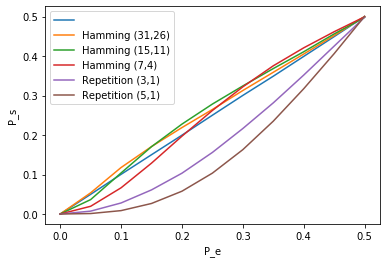

In [7]:
plot_ps(code_len, encoder_names)

# Log Scale

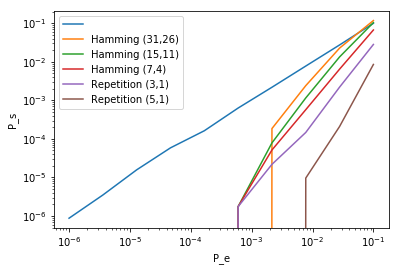

In [27]:
P, error_probs = plot_ps(code_len, encoder_names)

# 1- Using Interleaver

# Burst Error Without Interleaver (2 repetition)

In [228]:
code_len = int(26*11*4*100)
encoder_names = [None, "Hamming (31,26)", "Hamming (15,11)", "Hamming (7,4)", "Repetition (3,1)", "Repetition (5,1)"]
interleaver_names = [None, None, None, None, None, None]
burst_nums = [None, 2, 2, 2, 2, 2]

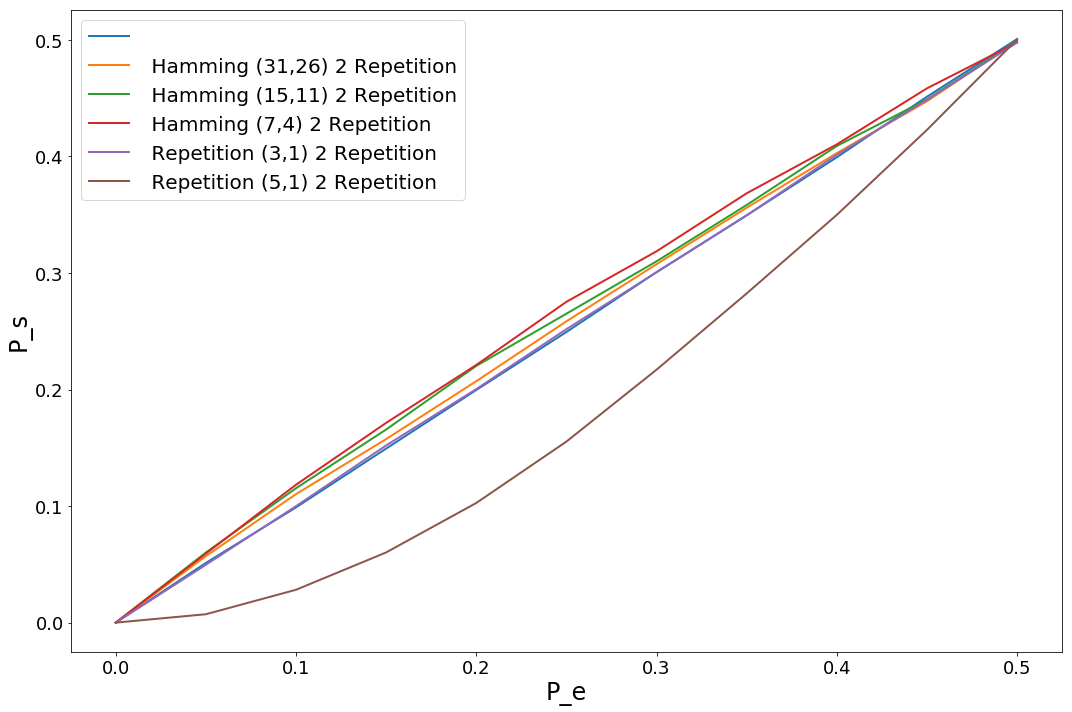

In [229]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, burst_nums, logarithmic = False)

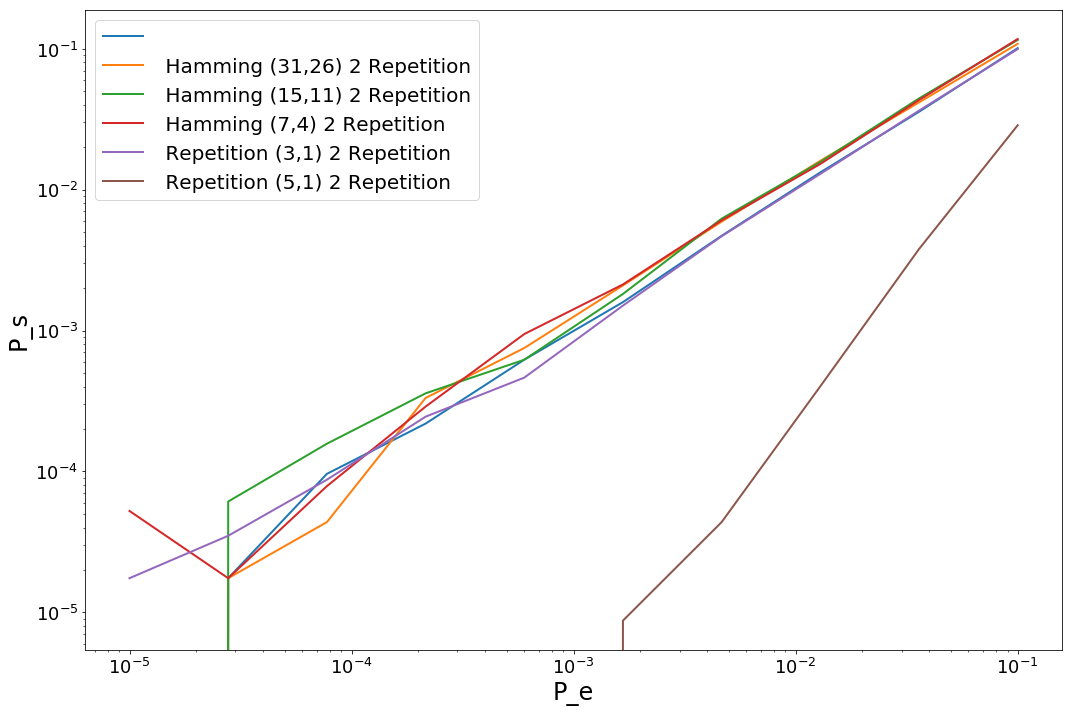

In [230]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, burst_nums, logarithmic = True)

# Burst Error With Interleaver (2 repetition)

In [231]:
code_len = int(26*11*4*100)
encoder_names = [None, "Hamming (31,26)", "Hamming (15,11)", "Hamming (7,4)", "Repetition (3,1)", "Repetition (5,1)"]
interleaver_names = [None, "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver"]
burst_nums = [None, 2, 2, 2, 2, 2]

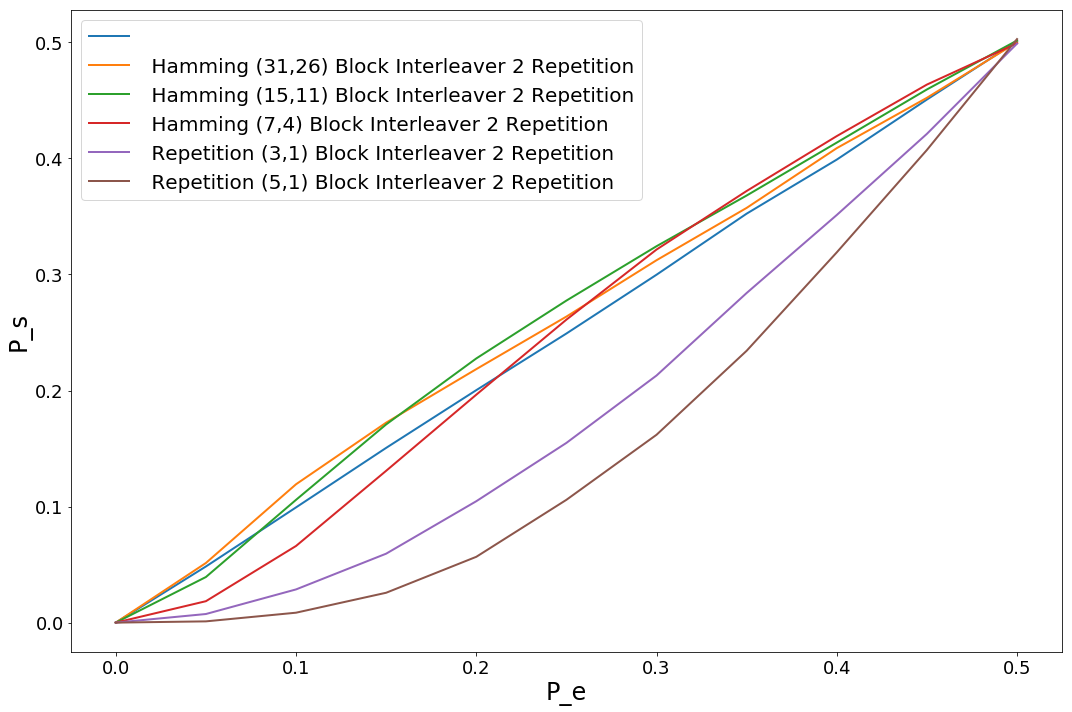

In [232]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, burst_nums, logarithmic = False)

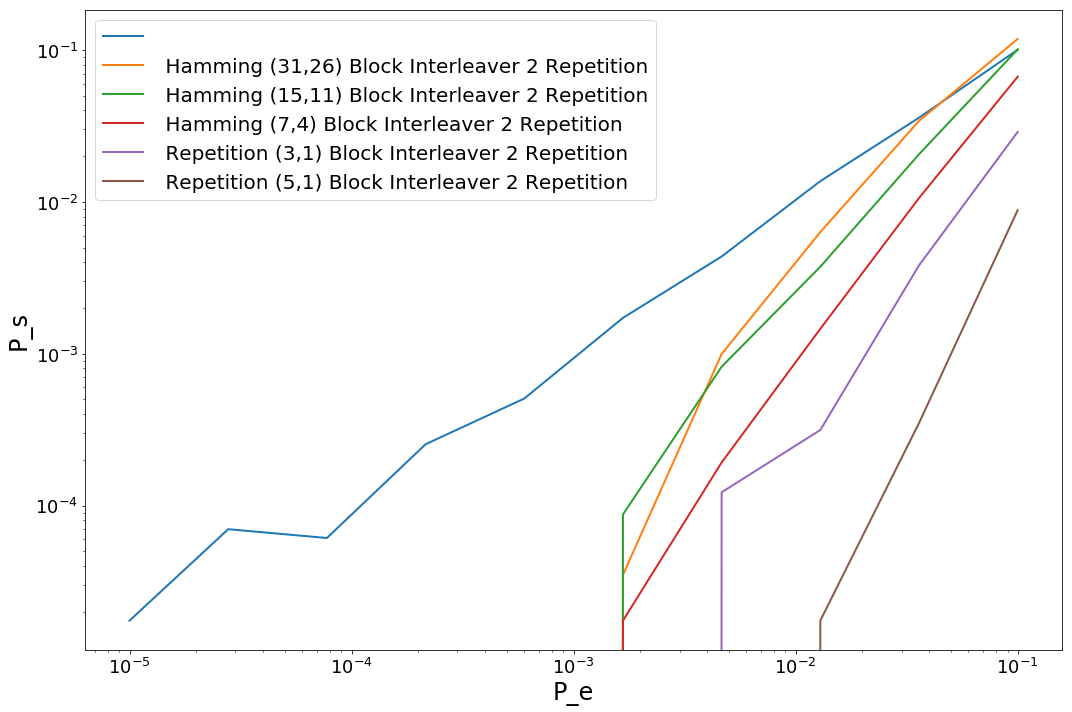

In [233]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, burst_nums, logarithmic = True)

# Burst Error Without Interleaver (5 repetition)

In [234]:
code_len = int(26*11*4*100)
encoder_names = [None, "Hamming (31,26)", "Hamming (15,11)", "Hamming (7,4)", "Repetition (3,1)", "Repetition (5,1)"]
interleaver_names = [None, None, None, None, None, None]
burst_nums = [None, 5, 5, 5, 5, 5]

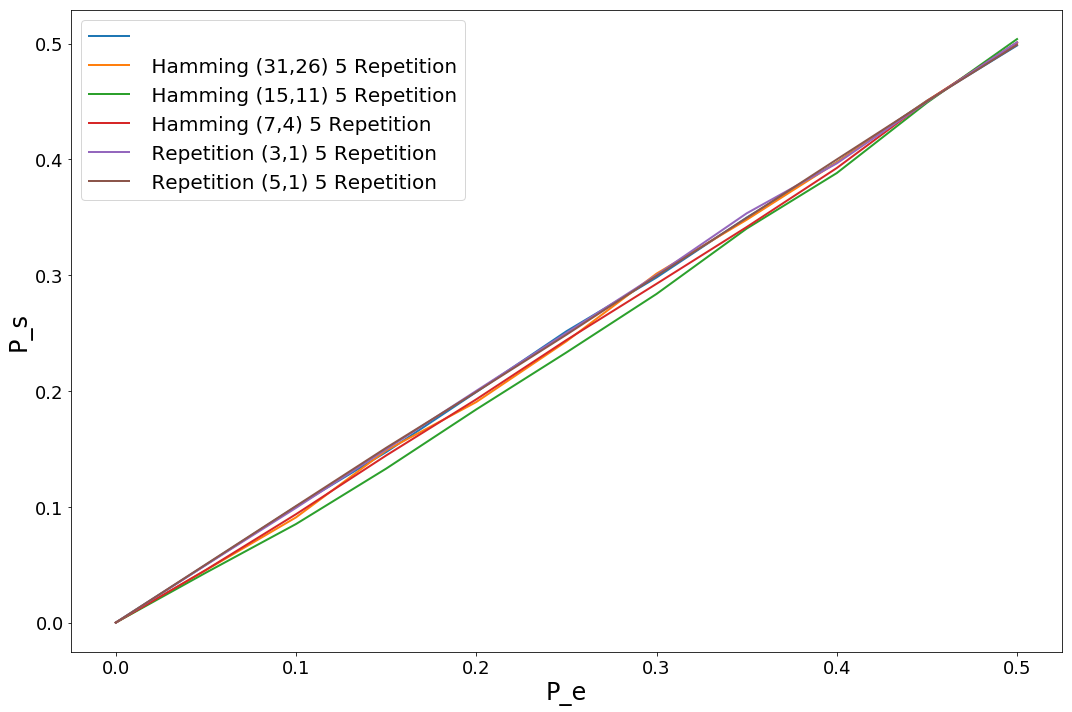

In [235]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, burst_nums, logarithmic = False)

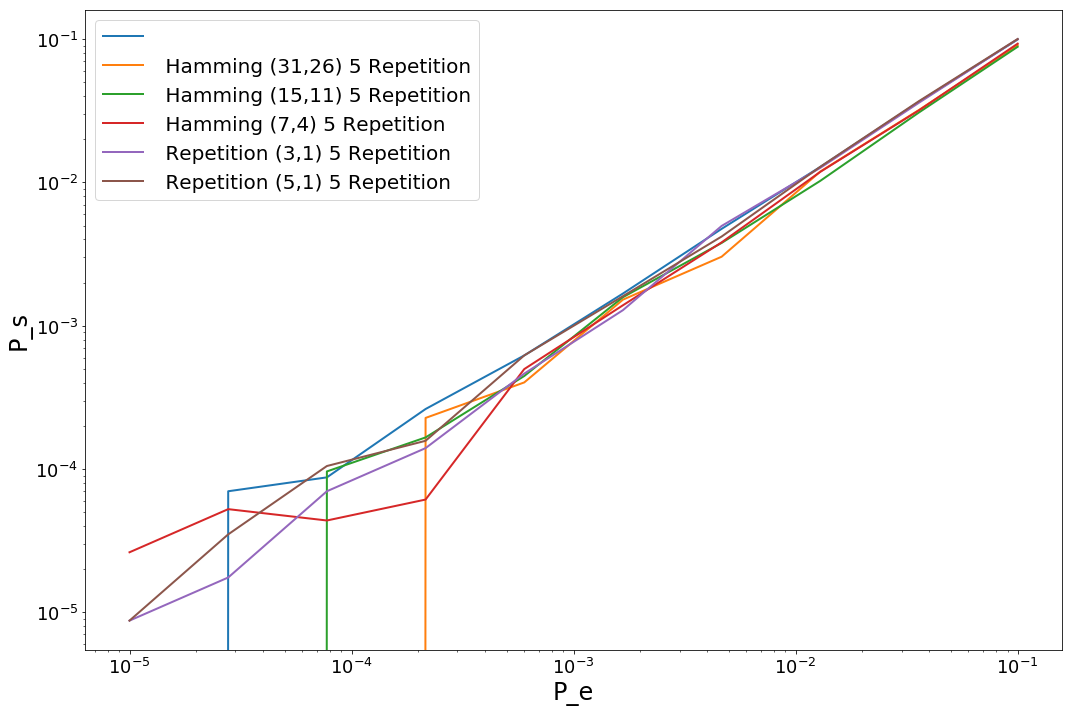

In [236]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, burst_nums, logarithmic = True)

# Burst Error With Interleaver (5 repetition)

In [237]:
code_len = int(26*11*4*100)
encoder_names = [None, "Hamming (31,26)", "Hamming (15,11)", "Hamming (7,4)", "Repetition (3,1)", "Repetition (5,1)"]
interleaver_names = [None, "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver"]
burst_nums = [None, 5, 5, 5, 5, 5]

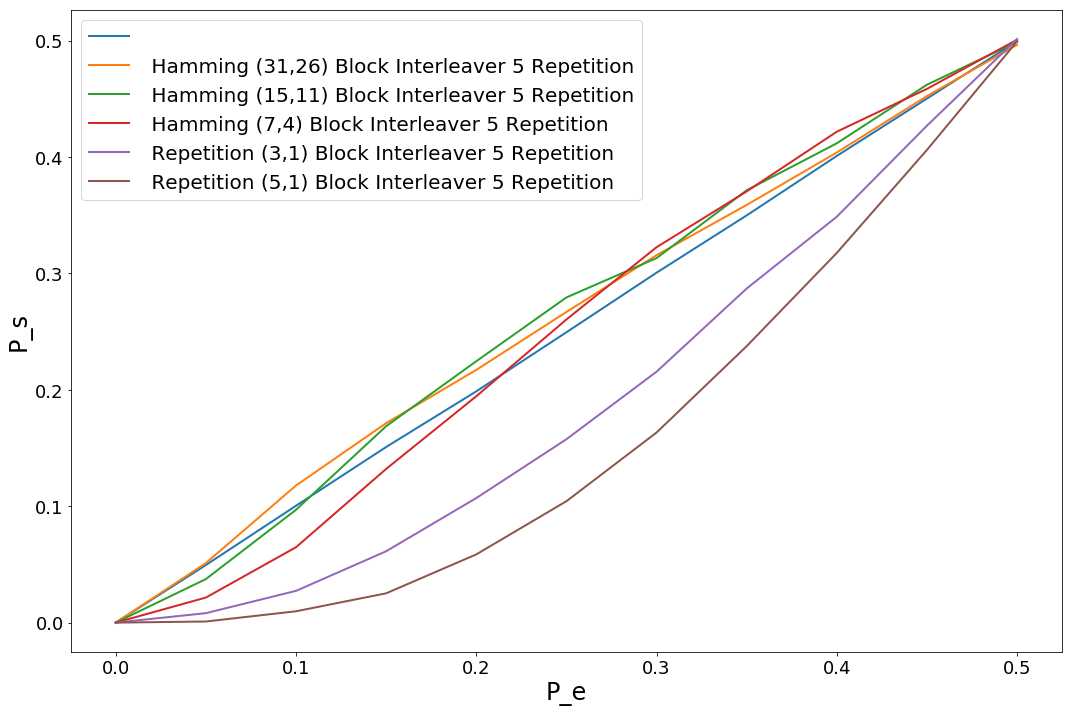

In [238]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, burst_nums, logarithmic = False)

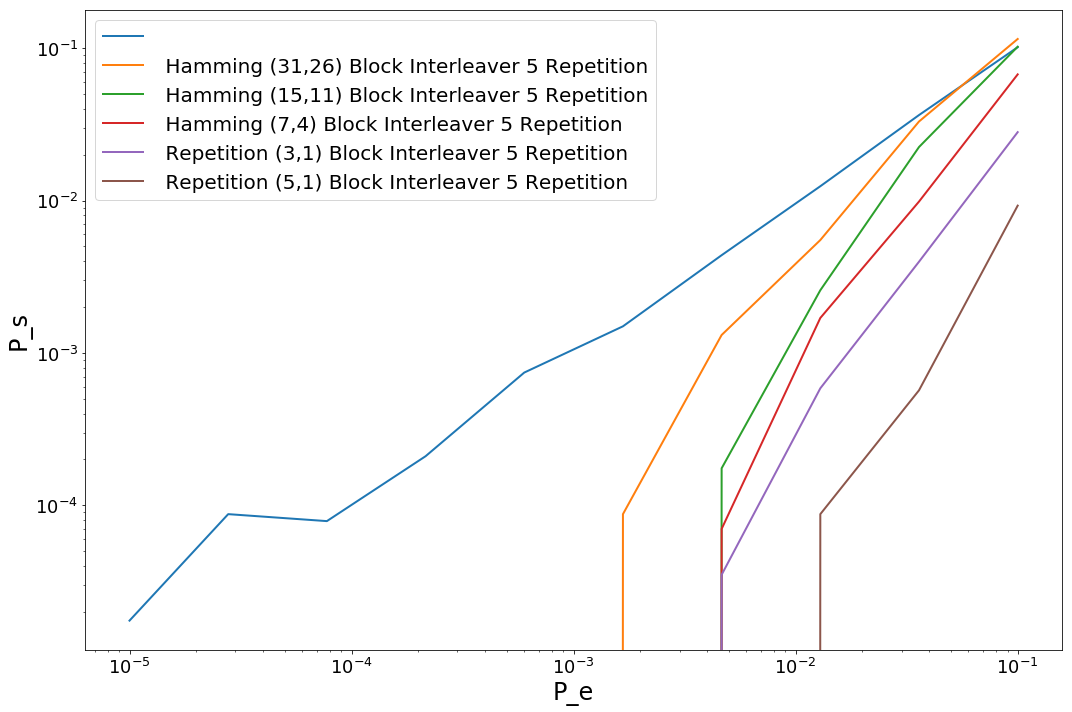

In [239]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, burst_nums, logarithmic = True)

# 2- Line Coding and Bit Inversion

# Bit Inversion Without Line Coding

In [152]:
code_len = int(26*11*4*100)
encoder_names = [None, "Hamming (31,26)", "Hamming (15,11)", "Hamming (7,4)", "Repetition (3,1)", "Repetition (5,1)"]
interleaver_names = [None, "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver"]
line_encoder_names = [None, None, None, None, None, None]
burst_nums = [None, 2, 2, 2, 2, 2]

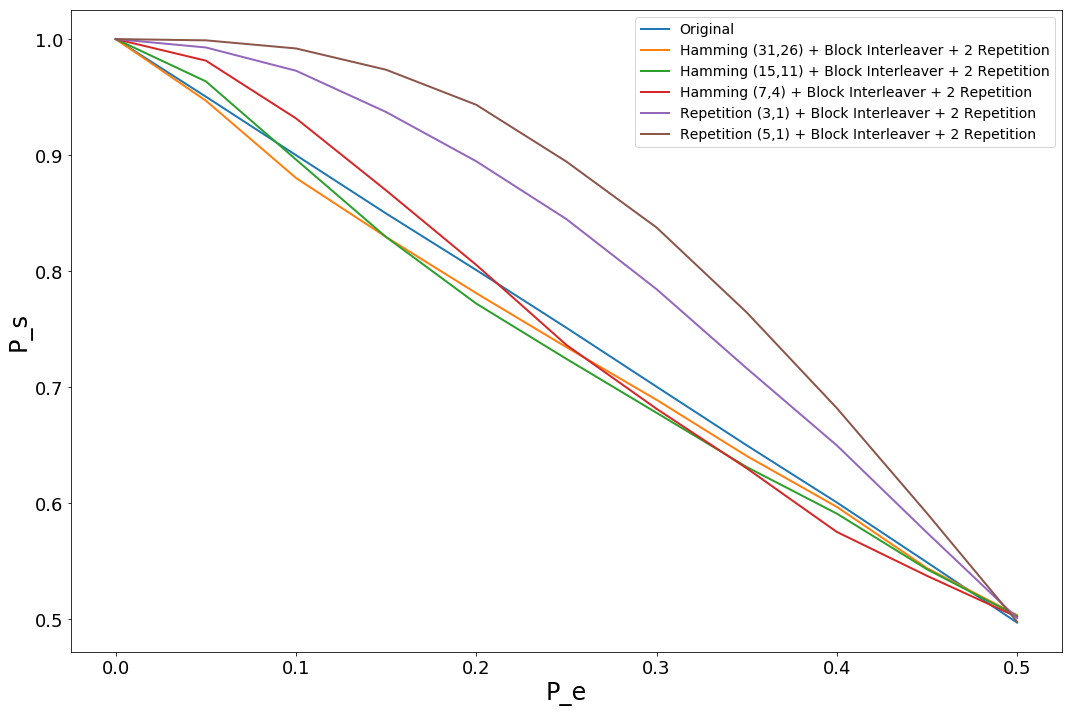

In [154]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, line_encoder_names, burst_nums, logarithmic = False)

# NRZ-M + 2 Burst Repetition

In [72]:
code_len = int(26*11*4*1)
encoder_names = [None, "Hamming (31,26)", "Hamming (15,11)", "Hamming (7,4)", "Repetition (3,1)", "Repetition (5,1)"]
interleaver_names = [None, "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver"]
line_encoder_names = ["NRZ-M", "NRZ-M", "NRZ-M", "NRZ-M", "NRZ-M", "NRZ-M"]
burst_nums = [None, 2, 2, 2, 2, 2]

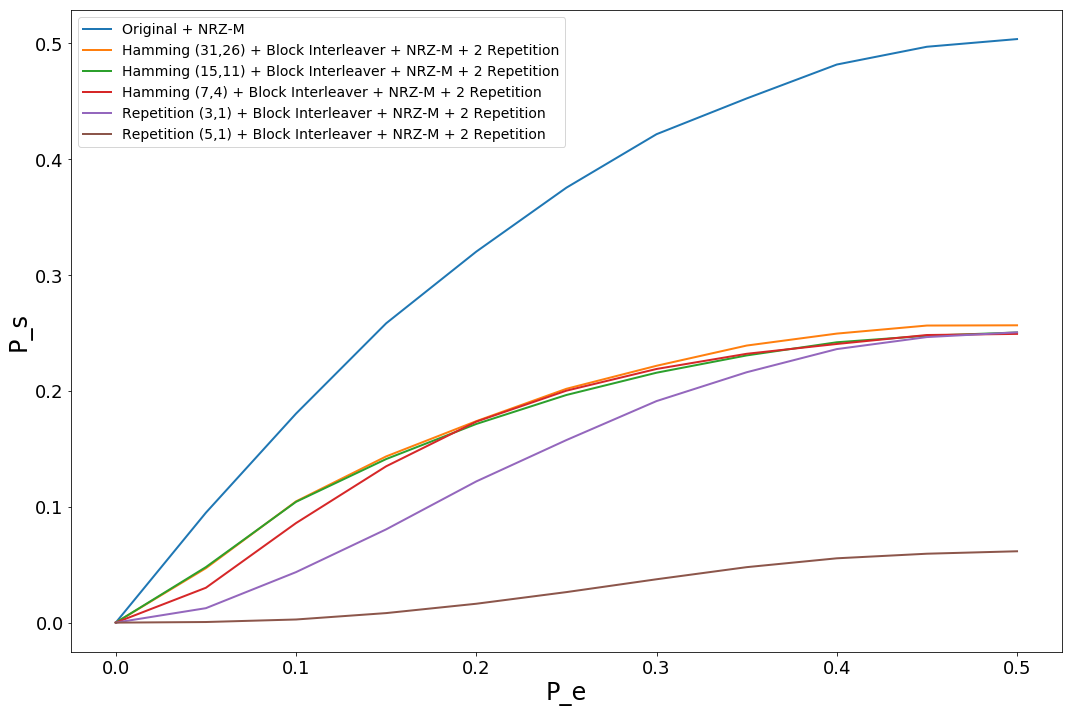

In [150]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, line_encoder_names, burst_nums, logarithmic = False)

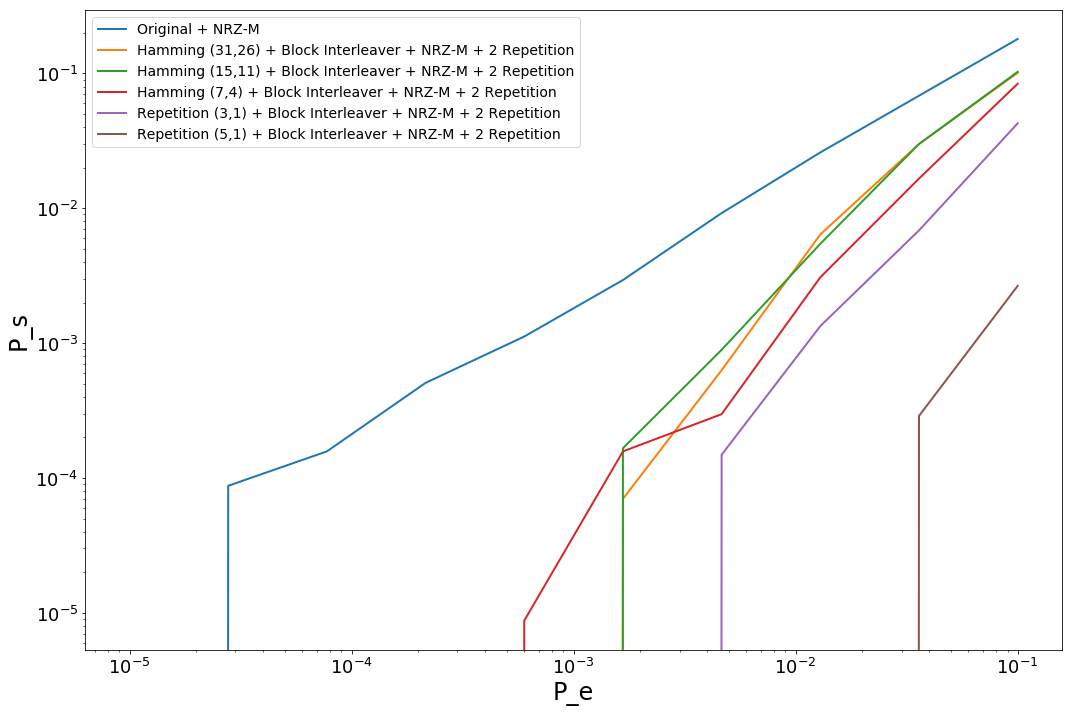

In [151]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, line_encoder_names, burst_nums, logarithmic = True)

# NRZ-M + 5 Burst Repetition

In [69]:
code_len = int(26*11*4*1)
encoder_names = [None, "Hamming (31,26)", "Hamming (15,11)", "Hamming (7,4)", "Repetition (3,1)", "Repetition (5,1)"]
interleaver_names = [None, "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver"]
line_encoder_names = ["NRZ-M", "NRZ-M", "NRZ-M", "NRZ-M", "NRZ-M", "NRZ-M"]
burst_nums = [None, 5, 5, 5, 5, 5]

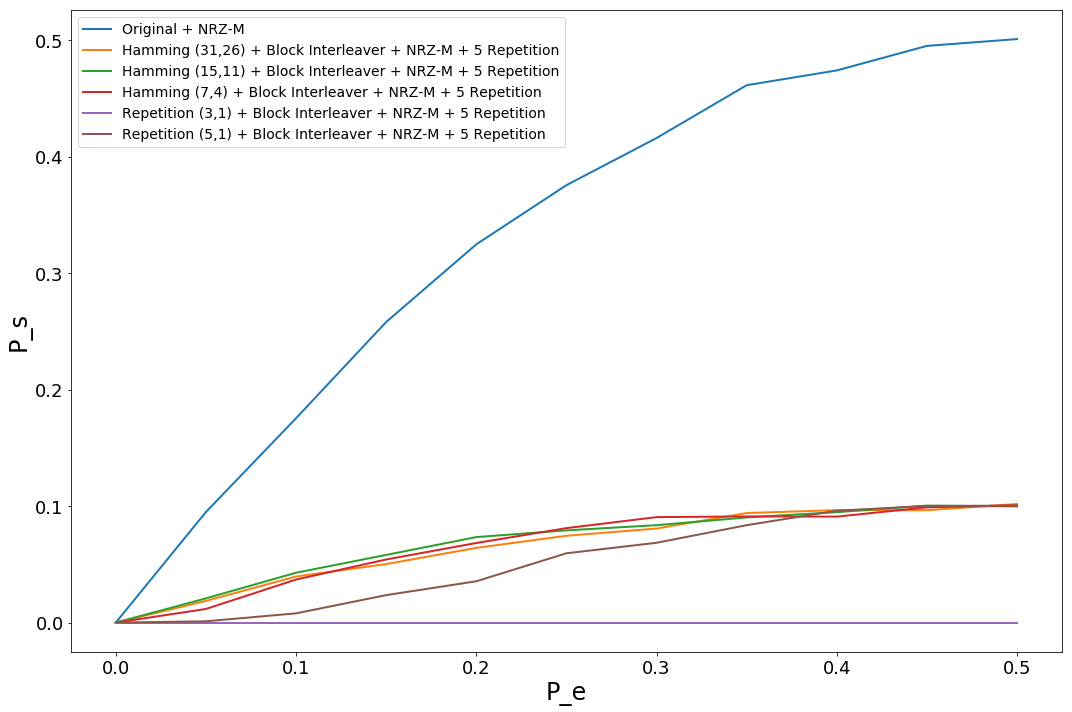

In [111]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, line_encoder_names, burst_nums, logarithmic = False)

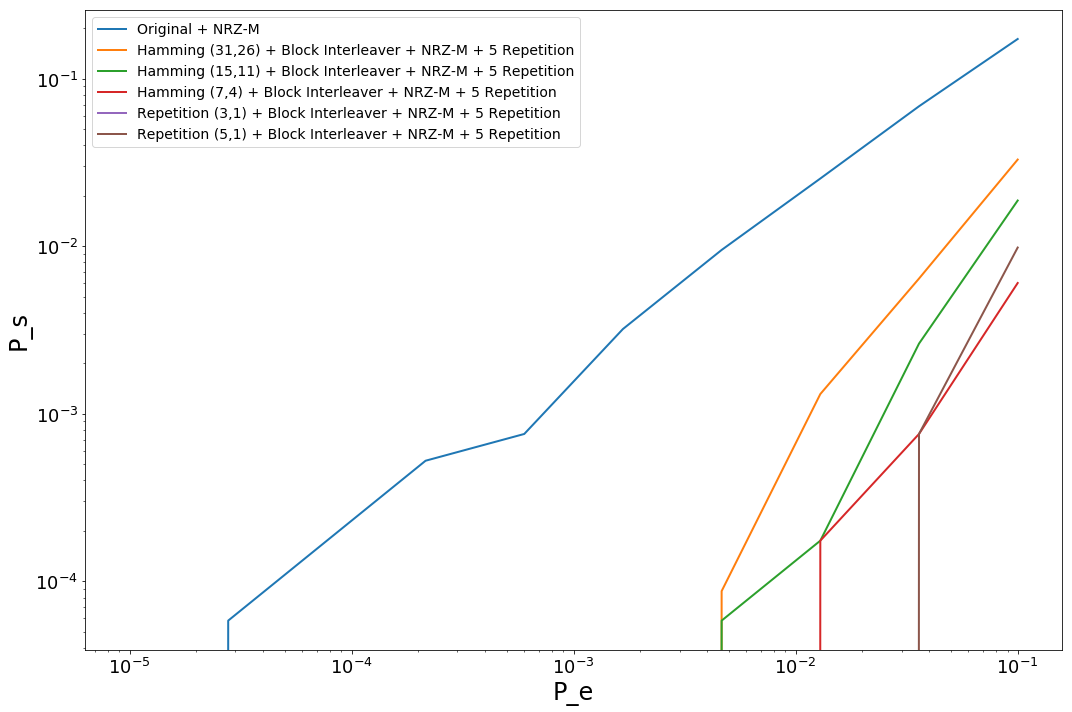

In [116]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names, line_encoder_names, burst_nums, logarithmic = True)

# Try

In [30]:
code_len = int(26*11*4*1)
encoder_names = [None, "Hamming (31,26)", "Hamming (15,11)", "Hamming (7,4)", "Repetition (3,1)", "Repetition (5,1)"]
interleaver_names = [None, "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver"]
line_encoder_names = ["NRZ-M", "NRZ-M", "NRZ-M", "NRZ-M", "NRZ-M", "NRZ-M"]
burst_nums = [None, 2, 2, 2, 2, 2]

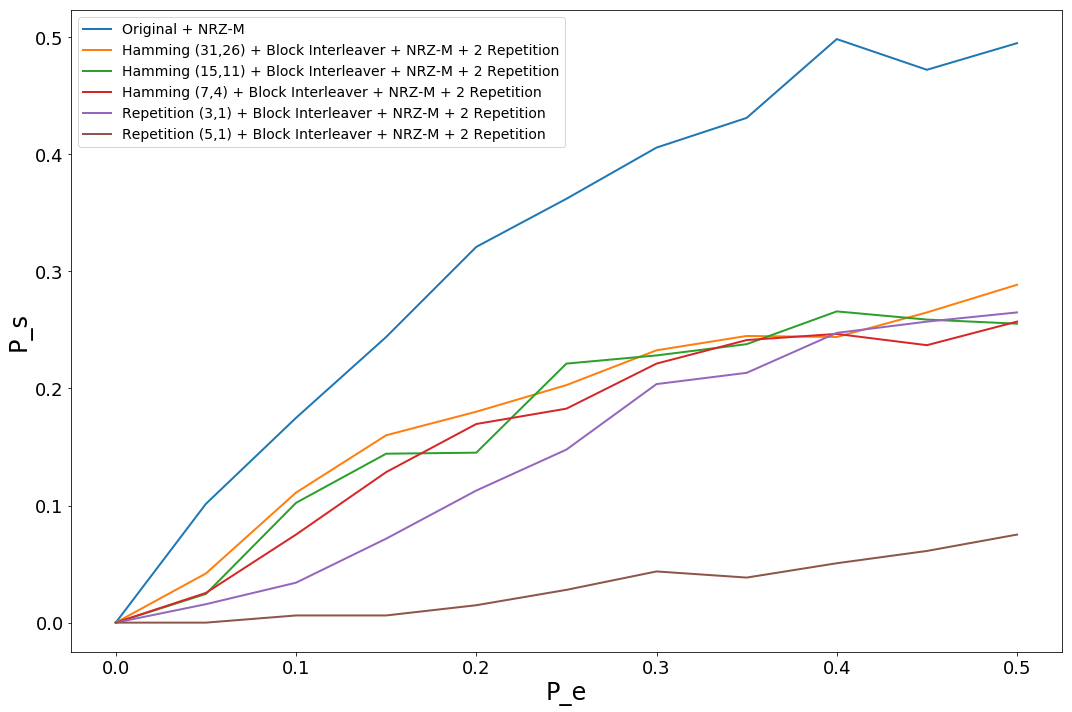

In [32]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names,
                         line_encoder_names, burst_nums, record = True, logarithmic = False)

# Socket

# Send

In [1]:
import socket
import pickle

In [66]:
HOST = '192.168.43.112'
PORT = 5017

arr_list = []
for encoder_name in encoder_names:
    arr_list.append(np.loadtxt("Yasin Data/"+encoder_name+"/nrzm_encoder.txt").astype(int))
arr_list.append(np.loadtxt("Yasin Data/message.txt").astype(int))

for i in range(6):
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.connect((HOST, PORT))
    arr = arr_list[i]
    data_string = pickle.dumps(arr)
    s.send(data_string)
    s.close()

# Receive

In [14]:
HOST = '192.168.43.26'
PORT = 5010

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.bind((HOST, PORT))

data_arrs = []
for i in range(6):
    
    s.listen(1)
    conn, addr = s.accept()
    print ('Connected by', addr)
    data = []
    while True:
        packet = conn.recv(4096)
        if not packet: break
        data.append(packet)
    data_arr = pickle.loads(b"".join(data))
    data_arrs.append(data_arr)
    print (data_arr)
    conn.close()

Connected by ('192.168.43.112', 57183)
[[1. 0. 0. ... 1. 0. 1.]]
Connected by ('192.168.43.112', 57184)
[[1. 0. 0. ... 1. 0. 1.]]
Connected by ('192.168.43.112', 57185)
[[1. 0. 1. ... 0. 0. 1.]]
Connected by ('192.168.43.112', 57186)
[[1. 1. 1. ... 0. 1. 0.]]
Connected by ('192.168.43.112', 57187)
[[1. 1. 0. ... 0. 0. 1.]]
Connected by ('192.168.43.112', 57188)
[1 0 0 ... 0 1 1]


In [52]:
np.savetxt("Umut Data/message.txt", data_arrs[5], fmt = '%i')

In [48]:
code_len = int(26*11*4*1)
encoder_names = ["Repetition (3,1)", "Repetition (5,1)", "Hamming (7,4)", "Hamming (15,11)", "Hamming (31,26)"]
interleaver_names = ["Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver", "Block Interleaver"]
line_encoder_names = ["NRZ-M", "NRZ-M", "NRZ-M", "NRZ-M", "NRZ-M"]
burst_nums = [2, 2, 2, 2, 2]

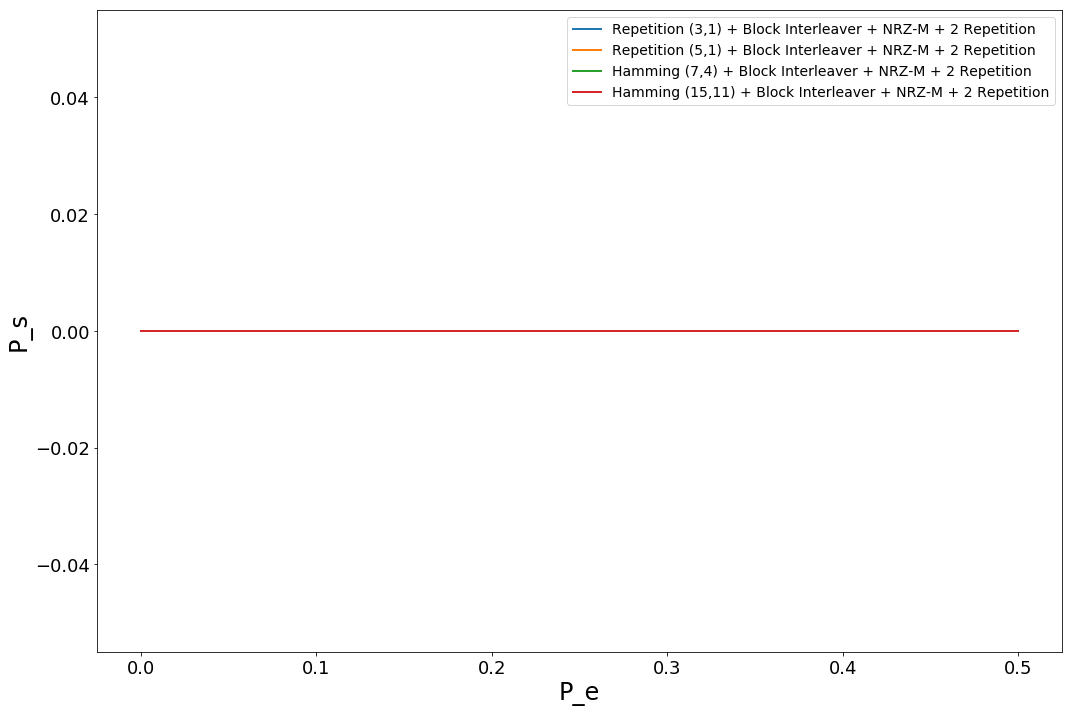

In [62]:
P, error_probs = plot_ps(code_len, encoder_names, interleaver_names,
                         line_encoder_names, burst_nums, data_arrs[0:4], record = False, logarithmic = False)